<a href="https://colab.research.google.com/github/robertoricci/Analise-Financeira/blob/main/Prevendo_A%C3%A7%C3%B5es_com_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret
!pip install yfinance


  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
#permitir que o pycaret seja utilizado dentro do colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd
import yfinance as yf

In [4]:
#escolher uma ação
df= yf.Ticker('RADL3.SA')
raia = df.history(period='2y')
raia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-20,20.459428,20.502777,20.020012,20.286026,11656000,0.0,0.0
2020-05-21,20.278147,21.210180,20.167799,21.164860,9926500,0.0,0.0
2020-05-22,20.985546,21.821028,20.536278,20.800322,8539000,0.0,0.0
2020-05-25,21.261411,21.440724,20.855493,21.076187,6317500,0.0,0.0
2020-05-26,21.281117,21.872260,21.155006,21.499840,8391500,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-16,18.459999,18.580000,18.070000,18.190001,8047400,0.0,0.0
2022-05-17,18.280001,18.799999,18.280001,18.540001,6770500,0.0,0.0
2022-05-18,18.530001,18.809999,17.830000,18.270000,15133000,0.0,0.0


In [5]:
#retirar campos desnecessários
raia = raia.drop(['Dividends','Stock Splits'],axis=1)

In [6]:
#criando novos campos 
#media movel 7 dias 
raia['MM7d'] = raia['Close'].rolling(window=7).mean().round(2)
raia['MM30d'] = raia['Close'].rolling(window=30).mean().round(2)
raia

,Open,High,Low,Close,Volume,MM7d,MM30d
Date,,,,,,,
2020-05-20,20.459428,20.502777,20.020012,20.286026,11656000,NaN,NaN
2020-05-21,20.278147,21.210180,20.167799,21.164860,9926500,NaN,NaN
2020-05-22,20.985546,21.821028,20.536278,20.800322,8539000,NaN,NaN
2020-05-25,21.261411,21.440724,20.855493,21.076187,6317500,NaN,NaN
2020-05-26,21.281117,21.872260,21.155006,21.499840,8391500,NaN,NaN
...,...,...,...,...,...,...,...
2022-05-16,18.459999,18.580000,18.070000,18.190001,8047400,18.69,21.41
2022-05-17,18.280001,18.799999,18.280001,18.540001,6770500,18.62,21.23
2022-05-18,18.530001,18.809999,17.830000,18.270000,15133000,18.52,21.04


In [7]:
#retirar ultimos 5 dias para previsao
raia_prever = raia.tail(5)

In [8]:
raia_prever

,Open,High,Low,Close,Volume,MM7d,MM30d
Date,,,,,,,
2022-05-16,18.459999,18.580000,18.070000,18.190001,8047400,18.69,21.41
2022-05-17,18.280001,18.799999,18.280001,18.540001,6770500,18.62,21.23
2022-05-18,18.530001,18.809999,17.830000,18.270000,15133000,18.52,21.04
2022-05-19,18.280001,18.540001,18.170000,18.350000,7272000,18.44,20.86
2022-05-20,18.459999,18.500000,18.129999,18.299999,4904000,18.41,20.69


In [9]:
#retir do dataframe
raia.drop(raia.tail(5).index,inplace=True)

In [10]:
raia

,Open,High,Low,Close,Volume,MM7d,MM30d
Date,,,,,,,
2020-05-20,20.459428,20.502777,20.020012,20.286026,11656000,NaN,NaN
2020-05-21,20.278147,21.210180,20.167799,21.164860,9926500,NaN,NaN
2020-05-22,20.985546,21.821028,20.536278,20.800322,8539000,NaN,NaN
2020-05-25,21.261411,21.440724,20.855493,21.076187,6317500,NaN,NaN
2020-05-26,21.281117,21.872260,21.155006,21.499840,8391500,NaN,NaN
...,...,...,...,...,...,...,...
2022-05-09,18.840000,19.270000,18.680000,18.930000,9942100,19.86,22.29
2022-05-10,19.000000,19.219999,18.590000,18.969999,6172700,19.58,22.13
2022-05-11,18.959999,19.010000,18.379999,18.459999,9170400,19.30,21.96


In [11]:
#empurrar para frente os valores das ações 
raia['Close'] = raia['Close'].shift(-1)
raia

,Open,High,Low,Close,Volume,MM7d,MM30d
Date,,,,,,,
2020-05-20,20.459428,20.502777,20.020012,21.164860,11656000,NaN,NaN
2020-05-21,20.278147,21.210180,20.167799,20.800322,9926500,NaN,NaN
2020-05-22,20.985546,21.821028,20.536278,21.076187,8539000,NaN,NaN
2020-05-25,21.261411,21.440724,20.855493,21.499840,6317500,NaN,NaN
2020-05-26,21.281117,21.872260,21.155006,22.061422,8391500,NaN,NaN
...,...,...,...,...,...,...,...
2022-05-09,18.840000,19.270000,18.680000,18.969999,9942100,19.86,22.29
2022-05-10,19.000000,19.219999,18.590000,18.459999,6172700,19.58,22.13
2022-05-11,18.959999,19.010000,18.379999,18.799999,9170400,19.30,21.96


In [12]:
#retirar os nulos 
raia.dropna(inplace=True)
raia

,Open,High,Low,Close,Volume,MM7d,MM30d
Date,,,,,,,
2020-07-01,22.000467,23.067934,21.842616,22.598328,10316500,21.77,21.64
2020-07-02,22.987035,23.133047,22.235271,22.616087,6160000,21.92,21.72
2020-07-03,22.377337,22.773938,22.335901,22.631872,1921000,22.11,21.77
2020-07-06,22.888380,22.937708,22.464156,22.245134,4188500,22.25,21.83
2020-07-07,22.620029,22.620029,22.083338,22.195807,4323500,22.36,21.87
...,...,...,...,...,...,...,...
2022-05-06,19.389999,19.389999,18.809999,18.930000,7596900,20.30,22.43
2022-05-09,18.840000,19.270000,18.680000,18.969999,9942100,19.86,22.29
2022-05-10,19.000000,19.219999,18.590000,18.459999,6172700,19.58,22.13


In [13]:
#drop index
raia.reset_index(drop=True,inplace=True)
raia_prever.reset_index(drop=True,inplace=True)
raia

,Open,High,Low,Close,Volume,MM7d,MM30d
0,22.000467,23.067934,21.842616,22.598328,10316500,21.77,21.64
1,22.987035,23.133047,22.235271,22.616087,6160000,21.92,21.72
2,22.377337,22.773938,22.335901,22.631872,1921000,22.11,21.77
3,22.888380,22.937708,22.464156,22.245134,4188500,22.25,21.83
4,22.620029,22.620029,22.083338,22.195807,4323500,22.36,21.87
...,...,...,...,...,...,...,...
457,19.389999,19.389999,18.809999,18.930000,7596900,20.30,22.43
458,18.840000,19.270000,18.680000,18.969999,9942100,19.86,22.29
459,19.000000,19.219999,18.590000,18.459999,6172700,19.58,22.13
460,18.959999,19.010000,18.379999,18.799999,9170400,19.30,21.96


In [14]:
!pip install Jinja2
!pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [14]:
#import jinja2

In [16]:
#import regressão lib pycaret

from pycaret.regression import *
setup(data=raia,target='Close',session_id=123)

,Description,Value
0,session_id,123
1,Target,Close
2,Original Data,"(462, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(323, 6)"


(False,
 False,
 {'cooks': 'Cooks Distance',
  'error': 'Prediction Error',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'learning': 'Learning Curve',
  'manifold': 'Manifold Learning',
  'parameter': 'Hyperparameters',
  'residuals': 'Residuals',
  'residuals_interactive': 'Interactive Residuals',
  'rfe': 'Feature Selection',
  'tree': 'Decision Tree',
  'vc': 'Validation Curve'},
           Open       High        Low     Volume       MM7d      MM30d
 49   22.858782  22.876541  22.118856  7198000.0  22.120001  22.330000
 85   23.955307  24.409718  23.639196  6838800.0  24.780001  24.219999
 34   22.274733  22.296438  21.891945  8652500.0  22.160000  22.730000
 231  27.622456  27.889771  27.285837  4898000.0  27.840000  26.719999
 236  27.087830  27.266039  26.691807  8999400.0  27.160000  26.920000
 ..         ...        ...        ...        ...        ...        ...
 347  23.351702  24.068684  23.311869  3410600.0  23.280001  22.879999
 191  24.

In [17]:
#TOP 3
top3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.3796,0.2389,0.4859,0.9230,0.0196,0.0159,0.012
lar,Least Angle Regression,0.3797,0.2389,0.4859,0.9230,0.0196,0.0159,0.013
br,Bayesian Ridge,0.3797,0.2391,0.4861,0.9229,0.0196,0.0159,0.013
omp,Orthogonal Matching Pursuit,0.4115,0.2665,0.5133,0.9135,0.0207,0.0173,0.012
et,Extra Trees Regressor,0.4133,0.2741,0.5196,0.9104,0.0208,0.0173,0.405
gbr,Gradient Boosting Regressor,0.4187,0.2874,0.5338,0.9063,0.0216,0.0176,0.071
rf,Random Forest Regressor,0.4299,0.2945,0.5388,0.9042,0.0217,0.0181,0.470
lr,Linear Regression,0.4288,0.3115,0.5522,0.8998,0.0223,0.0180,0.299
ada,AdaBoost Regressor,0.4566,0.3243,0.5655,0.8943,0.0228,0.0192,0.072
lightgbm,Light Gradient Boosting Machine,0.4872,0.3954,0.6247,0.8709,0.0258,0.0207,0.063


In [18]:
print(top3)

[Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001), Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     jitter=None, n_nonzero_coefs=500, normalize=True, precompute='auto',
     random_state=123, verbose=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)]


In [19]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [20]:
#criar modelo
ridge = create_model('ridge',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3658,0.2240,0.4733,0.9266,0.0186,0.0151
1,0.4147,0.2887,0.5373,0.9153,0.0219,0.0177
2,0.3461,0.1979,0.4449,0.9303,0.0180,0.0146
3,0.4277,0.3227,0.5681,0.9240,0.0223,0.0177
4,0.3342,0.1695,0.4117,0.9219,0.0167,0.0140
5,0.3607,0.2593,0.5092,0.9274,0.0212,0.0154
6,0.3608,0.2005,0.4477,0.9097,0.0176,0.0147
7,0.3241,0.1750,0.4183,0.9318,0.0172,0.0139
8,0.4025,0.2459,0.4959,0.9287,0.0205,0.0172


In [21]:
lar = create_model('lar',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3606,0.2178,0.4667,0.9286,0.0183,0.0149
1,0.4121,0.2866,0.5354,0.9159,0.0219,0.0176
2,0.3464,0.1979,0.4449,0.9303,0.0180,0.0146
3,0.4276,0.3218,0.5673,0.9242,0.0222,0.0177
4,0.3292,0.1668,0.4084,0.9232,0.0166,0.0138
5,0.3604,0.2592,0.5091,0.9274,0.0212,0.0154
6,0.3658,0.2041,0.4517,0.9081,0.0178,0.0149
7,0.3298,0.1793,0.4235,0.9301,0.0174,0.0141
8,0.4023,0.2434,0.4934,0.9295,0.0203,0.0172


In [22]:
br = create_model('br',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3658,0.2239,0.4732,0.9266,0.0186,0.0151
1,0.4144,0.2884,0.5370,0.9154,0.0219,0.0177
2,0.3460,0.1979,0.4448,0.9303,0.0180,0.0146
3,0.4277,0.3225,0.5679,0.9240,0.0223,0.0177
4,0.3339,0.1693,0.4115,0.9220,0.0167,0.0140
5,0.3605,0.2593,0.5092,0.9274,0.0212,0.0154
6,0.3616,0.2010,0.4484,0.9094,0.0177,0.0147
7,0.3250,0.1756,0.4191,0.9316,0.0172,0.0139
8,0.4025,0.2456,0.4956,0.9288,0.0205,0.0172


In [30]:
#tunnig parametros
ridge_params = {'alpha': [0.02,0.024,0.025,0.026,0.03]}
tunne_ridge = tune_model(ridge,n_iter=1000,optimize='RMSE',custom_grid=ridge_params)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3608,0.2180,0.4669,0.9285,0.0183,0.0149
1,0.4122,0.2867,0.5354,0.9159,0.0219,0.0176
2,0.3464,0.1979,0.4449,0.9303,0.0180,0.0146
3,0.4276,0.3218,0.5673,0.9242,0.0222,0.0177
4,0.3294,0.1669,0.4085,0.9232,0.0166,0.0138
5,0.3604,0.2592,0.5091,0.9274,0.0212,0.0154
6,0.3657,0.2039,0.4516,0.9081,0.0178,0.0149
7,0.3296,0.1792,0.4233,0.9302,0.0174,0.0141
8,0.4023,0.2435,0.4934,0.9294,0.0203,0.0172


In [32]:
#tunnig parametros
tunne_lar = tune_model(lar,n_iter=1000,optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3606,0.2178,0.4667,0.9286,0.0183,0.0149
1,0.4121,0.2866,0.5354,0.9159,0.0219,0.0176
2,0.3464,0.1979,0.4449,0.9303,0.0180,0.0146
3,0.4276,0.3218,0.5673,0.9242,0.0222,0.0177
4,0.3292,0.1668,0.4084,0.9232,0.0166,0.0138
5,0.3604,0.2592,0.5091,0.9274,0.0212,0.0154
6,0.3658,0.2041,0.4517,0.9081,0.0178,0.0149
7,0.3298,0.1793,0.4235,0.9301,0.0174,0.0141
8,0.4023,0.2434,0.4934,0.9295,0.0203,0.0172


In [33]:
tunne_br = tune_model(br,n_iter=1000,optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3642,0.2220,0.4712,0.9272,0.0185,0.0150
1,0.4138,0.2879,0.5365,0.9156,0.0219,0.0177
2,0.3460,0.1979,0.4448,0.9303,0.0180,0.0146
3,0.4277,0.3223,0.5677,0.9241,0.0223,0.0177
4,0.3326,0.1686,0.4106,0.9224,0.0167,0.0140
5,0.3601,0.2592,0.5091,0.9274,0.0212,0.0154
6,0.3627,0.2018,0.4492,0.9091,0.0177,0.0148
7,0.3262,0.1766,0.4202,0.9312,0.0173,0.0140
8,0.4024,0.2449,0.4949,0.9290,0.0204,0.0172


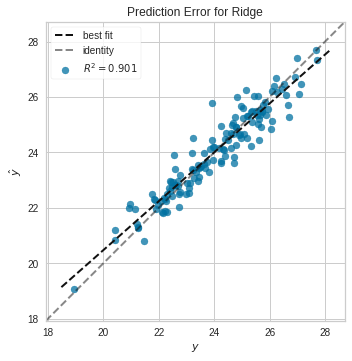

In [34]:
plot_model(tunne_ridge,plot='error')

https://www.youtube.com/watch?v=c_x1T7v_VGY